# S&P500一択への反論

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import yfinance as yf

In [2]:
tickers = ['^GSPC', '^N225']
df = yf.download(tickers, interval='1mo')['Adj Close']
# df['log_gspc'] = np.log(df['^GSPC'])
# df['log_n225'] = np.log(df['^N225'])
df.rename(columns={'^GSPC': 'sp', '^N225': 'nikkei'}, inplace=True)

path = '../../data/jpy_usd_rate.xlsx'
jpy_usd_rate = pd.read_excel(path, index_col=0)
jpy_usd_rate = jpy_usd_rate.sort_index()

df = pd.concat([df, jpy_usd_rate], axis=1)
df.dropna(axis=0, inplace=True)

df['sp_to_jpy'] = df['sp'] * df['usd_jpy']

# 対数リターンの計算
df['sp_to_jpy_return'] = np.log(df['sp_to_jpy']).diff()
df['nikkei_return'] = np.log(df['nikkei']).diff()

# 累積対数リターンの計算
df['sp_to_jpy_cumulative_return'] = df['sp_to_jpy_return'].cumsum()
df['nikkei_cumulative_return'] = df['nikkei_return'].cumsum()

# 指数化
df['sp_to_jpy_cumulative_return'] = np.exp(df['sp_to_jpy_cumulative_return']) - 1
df['nikkei_cumulative_return'] = np.exp(df['nikkei_cumulative_return']) - 1


[*********************100%***********************]  2 of 2 completed


In [3]:
df

,sp,nikkei,usd_jpy,low,high,dates,sp_to_jpy,sp_to_jpy_return,nikkei_return,sp_to_jpy_cumulative_return,nikkei_cumulative_return
1985-01-01,179.630005,11992.309570,253.758022,251.036683,255.473811,23,45582.554731,NaN,NaN,NaN,NaN
1985-02-01,181.179993,12321.919922,260.200188,256.156641,262.805810,20,47143.068156,0.033662,0.027114,0.034235,0.027485
1985-03-01,180.660004,12580.759766,258.399539,251.565677,261.968594,21,46682.461662,-0.009818,0.020789,0.024130,0.049069
1985-04-01,179.830002,12426.290039,251.540621,247.569589,255.200324,22,45234.550335,-0.031507,-0.012354,-0.007635,0.036188
1985-05-01,189.550003,12758.459961,251.583255,249.393075,254.923499,23,47687.606753,0.052810,0.026380,0.046181,0.063887
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,5648.399902,38647.750000,146.262754,142.239650,150.764668,22,826150.525410,-0.053683,-0.011680,17.124270,2.222711
2024-09-01,5762.479980,37919.550781,143.240012,139.906525,146.966820,21,825417.701552,-0.000887,-0.019022,17.108193,2.161989
2024-10-01,5705.450195,39081.250000,149.683031,143.757893,153.759050,23,854009.078454,0.034052,0.030176,17.735437,2.258859
2024-11-01,6032.379883,38208.031250,153.564796,150.198826,155.928985,21,926361.186099,0.081322,-0.022597,19.322713,2.186044


In [6]:
sp = df['sp_to_jpy_cumulative_return'] * 100
nikkei = df['nikkei_cumulative_return'] * 100

start = df.index[0]
end = df.index[156]
start, end

(Timestamp('1985-01-01 00:00:00'), Timestamp('1998-01-01 00:00:00'))

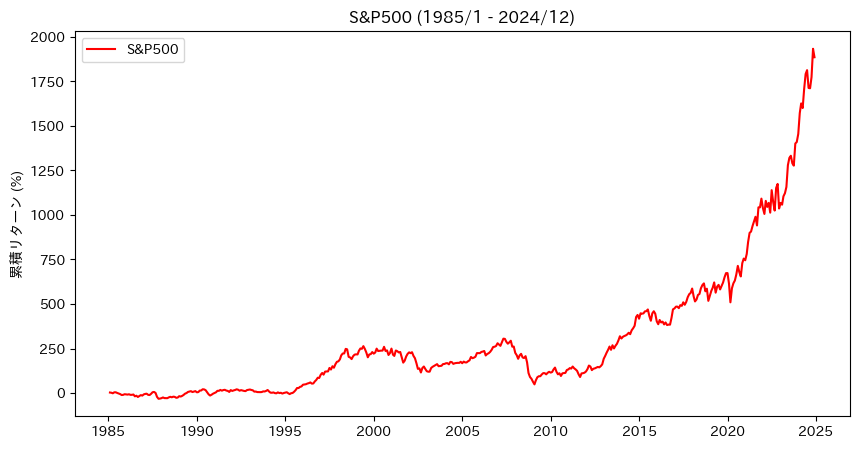

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sp, label='S&P500', color='red')
plt.ylabel('累積リターン (%)')
plt.title('S&P500 (1985/1 - 2024/12)')
plt.show()

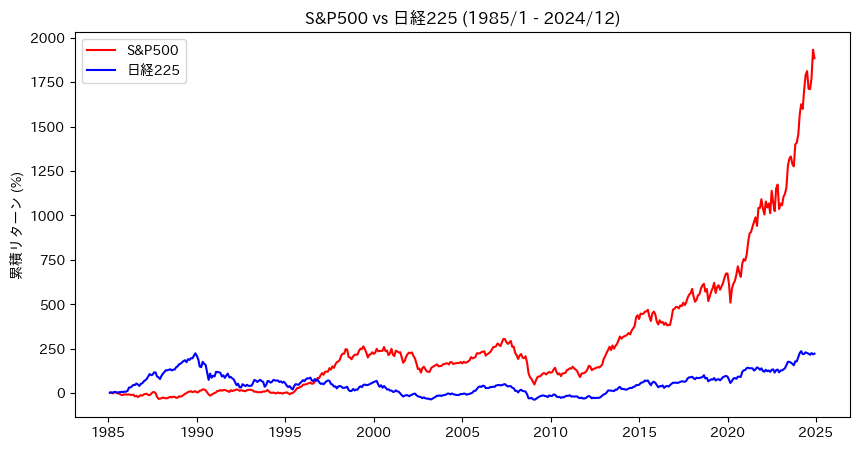

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sp, label='S&P500', color='red')
sns.lineplot(data=nikkei, label='日経225', color='blue')
plt.ylabel('累積リターン (%)')
plt.title('S&P500 vs 日経225 (1985/1 - 2024/12)')
plt.show()

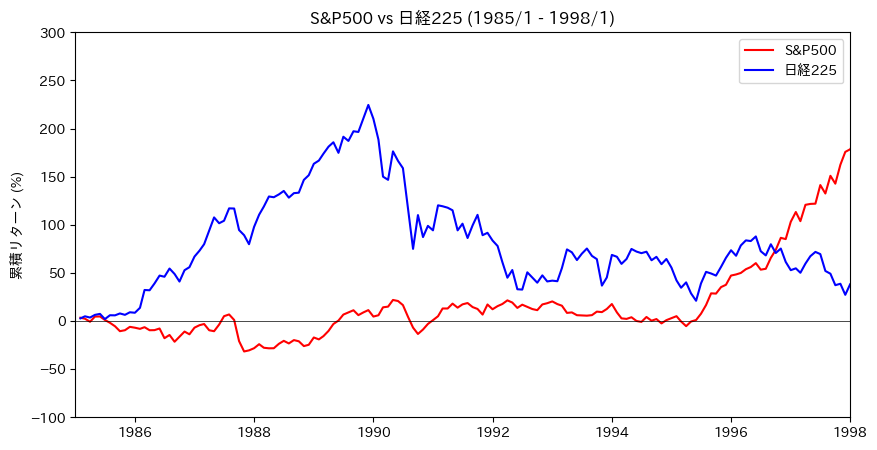

In [21]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sp, label='S&P500', color='red')
sns.lineplot(data=nikkei, label='日経225', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.ylabel('累積リターン (%)')
plt.xlim(start, end)
plt.ylim(-100, 300)
plt.title('S&P500 vs 日経225 (1985/1 - 1998/1)')
plt.show()

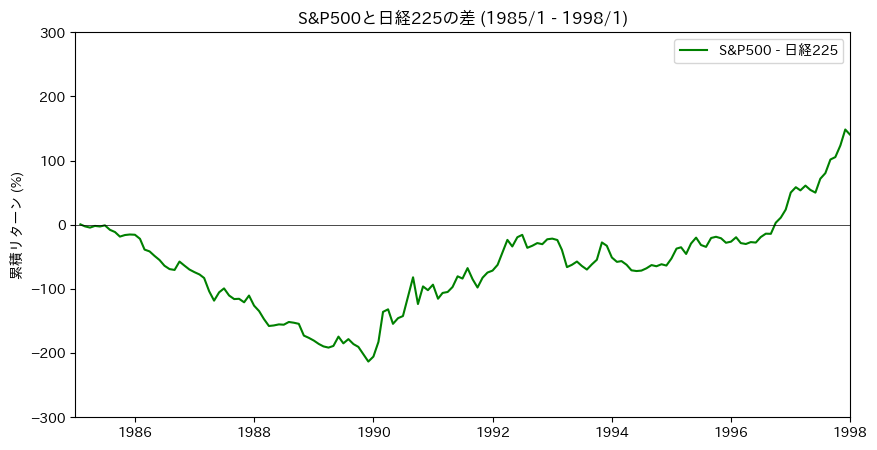

In [13]:
sp_minus_nikkei = sp - nikkei

plt.figure(figsize=(10, 5))
sns.lineplot(data=sp_minus_nikkei, label='S&P500 - 日経225', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.ylabel('累積リターン (%)')
plt.xlim(start, end)
plt.ylim(-300, 300)
plt.title('S&P500と日経225の差 (1985/1 - 1998/1)')
plt.show()

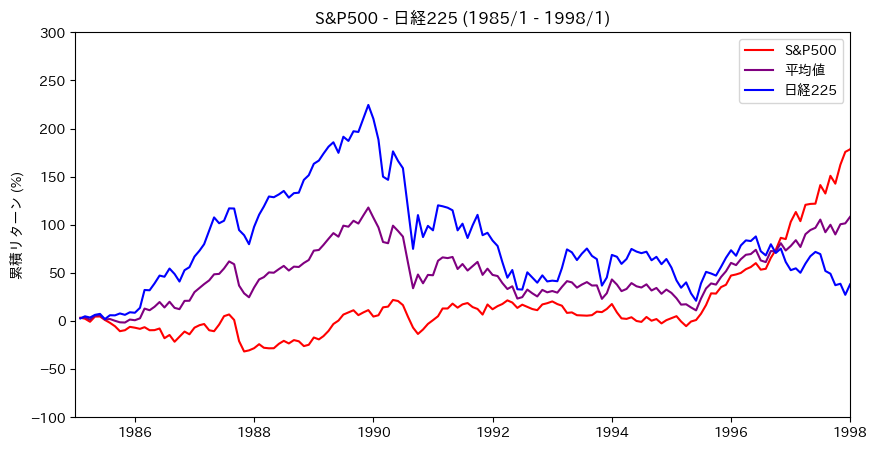

In [14]:
mean = 0.5 * sp + 0.5 * nikkei

plt.figure(figsize=(10, 5))
sns.lineplot(data=sp, label='S&P500', color='red')
sns.lineplot(data=mean, label='平均値', color='purple')
sns.lineplot(data=nikkei, label='日経225', color='blue')
plt.ylabel('累積リターン (%)')
plt.xlim(start, end)
plt.ylim(-100, 300)
plt.title('S&P500 - 日経225 (1985/1 - 1998/1)')
plt.show()

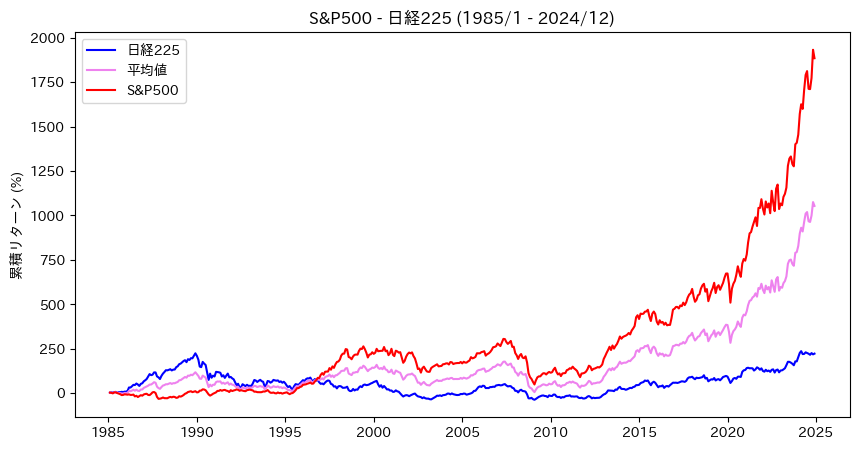

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=nikkei, label='日経225', color='blue')
sns.lineplot(data=mean, label='平均値', color='violet')
sns.lineplot(data=sp, label='S&P500', color='red')
plt.ylabel('累積リターン (%)')
plt.title('S&P500 - 日経225 (1985/1 - 2024/12)')
plt.show()